<a href="https://colab.research.google.com/github/Andybrizt/Coursera_Capstone/blob/master/Coursera_Capstone_final_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

>This notebook is Coursera_Capstone_final

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!pip install  geopy # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!pip install folium # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


>Use pandas read_html() to parse the data from Wikipedia

In [2]:
data = pd.read_html('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M')

In [3]:
df = pd.DataFrame(data[0])

In [4]:
df=df.rename(columns={"Neighbourhood": "Neighborhood"})

>Drop the row that Borough value is 'Not assigned'

In [5]:
df=df[df.Borough!='Not assigned']
df

Postal Code           Borough  \
2           M3A        North York   
3           M4A        North York   
4           M5A  Downtown Toronto   
5           M6A        North York   
6           M7A  Downtown Toronto   
8           M9A         Etobicoke   
9           M1B       Scarborough   
11          M3B        North York   
12          M4B         East York   
13          M5B  Downtown Toronto   
14          M6B        North York   
17          M9B         Etobicoke   
18          M1C       Scarborough   
20          M3C        North York   
21          M4C         East York   
22          M5C  Downtown Toronto   
23          M6C              York   
26          M9C         Etobicoke   
27          M1E       Scarborough   
30          M4E      East Toronto   
31          M5E  Downtown Toronto   
32          M6E              York   
36          M1G       Scarborough   
39          M4G         East York   
40          M5G  Downtown Toronto   
41          M6G  Downtown Toronto   
45          M1H       Scarborough   
46          M2H        North York   
47          M3H        North York   
48          M4H         East York   
49          M5H  Downtown Toronto   
50          M6H      West Toronto   
54          M1J       Scarborough   
55          M2J        North York   
56          M3J        North York   
57          M4J         East York   
58          M5J  Downtown Toronto   
59          M6J      West Toronto   
63          M1K       Scarborough   
64          M2K        North York   
65          M3K        North York   
66          M4K      East Toronto   
67          M5K  Downtown Toronto   
68          M6K      West Toronto   
72          M1L       Scarborough   
73          M2L        North York   
74          M3L        North York   
75          M4L      East Toronto   
76          M5L  Downtown Toronto   
77          M6L        North York   
80          M9L        North York   
81          M1M       Scarborough   
82          M2M        North York   
83          M3M        North York   
84          M4M      East Toronto   
85          M5M        North York   
86          M6M              York   
89          M9M        North York   
90          M1N       Scarborough   
91          M2N        North York   
92          M3N        North York   
93          M4N   Central Toronto   
94          M5N   Central Toronto   
95          M6N              York   
98          M9N              York   
99          M1P       Scarborough   
100         M2P        North York   
102         M4P   Central Toronto   
103         M5P   Central Toronto   
104         M6P      West Toronto   
107         M9P         Etobicoke   
108         M1R       Scarborough   
109         M2R        North York   
111         M4R   Central Toronto   
112         M5R   Central Toronto   
113         M6R      West Toronto   
114         M7R       Mississauga   
116         M9R         Etobicoke   
117         M1S       Scarborough   
120         M4S   Central Toronto   
121         M5S  Downtown Toronto   
122         M6S      West Toronto   
126         M1T       Scarborough   
129         M4T   Central Toronto   
130         M5T  Downtown Toronto   
135         M1V       Scarborough   
138         M4V   Central Toronto   
139         M5V  Downtown Toronto   
142         M8V         Etobicoke   
143         M9V         Etobicoke   
144         M1W       Scarborough   
147         M4W  Downtown Toronto   
148         M5W  Downtown Toronto   
151         M8W         Etobicoke   
152         M9W         Etobicoke   
153         M1X       Scarborough   
156         M4X  Downtown Toronto   
157         M5X  Downtown Toronto   
160         M8X         Etobicoke   
165         M4Y  Downtown Toronto   
168         M7Y      East Toronto   
169         M8Y         Etobicoke   
178         M8Z         Etobicoke   

                                          Neighborhood  
2                                            Parkwoods  
3                                     Vic

> Check if 'Not assigned' exists in the DataFrame df

In [6]:
'Not assigned' in df.values

False

In [7]:
df.shape

(103, 3)

In [8]:
! pip install geocoder

In [9]:
location_df = pd.read_csv('http://cocl.us/Geospatial_data')

In [10]:
location_df

Postal Code   Latitude  Longitude
0           M1B  43.806686 -79.194353
1           M1C  43.784535 -79.160497
2           M1E  43.763573 -79.188711
3           M1G  43.770992 -79.216917
4           M1H  43.773136 -79.239476
5           M1J  43.744734 -79.239476
6           M1K  43.727929 -79.262029
7           M1L  43.711112 -79.284577
8           M1M  43.716316 -79.239476
9           M1N  43.692657 -79.264848
10          M1P  43.757410 -79.273304
11          M1R  43.750072 -79.295849
12          M1S  43.794200 -79.262029
13          M1T  43.781638 -79.304302
14          M1V  43.815252 -79.284577
15          M1W  43.799525 -79.318389
16          M1X  43.836125 -79.205636
17          M2H  43.803762 -79.363452
18          M2J  43.778517 -79.346556
19          M2K  43.786947 -79.385975
20          M2L  43.757490 -79.374714
21          M2M  43.789053 -79.408493
22          M2N  43.770120 -79.408493
23          M2P  43.752758 -79.400049
24          M2R  43.782736 -79.442259
25          M3A  43.753259 -79.329656
26          M3B  43.745906 -79.352188
27          M3C  43.725900 -79.340923
28          M3H  43.754328 -79.442259
29          M3J  43.767980 -79.487262
30          M3K  43.737473 -79.464763
31          M3L  43.739015 -79.506944
32          M3M  43.728496 -79.495697
33          M3N  43.761631 -79.520999
34          M4A  43.725882 -79.315572
35          M4B  43.706397 -79.309937
36          M4C  43.695344 -79.318389
37          M4E  43.676357 -79.293031
38          M4G  43.709060 -79.363452
39          M4H  43.705369 -79.349372
40          M4J  43.685347 -79.338106
41          M4K  43.679557 -79.352188
42          M4L  43.668999 -79.315572
43          M4M  43.659526 -79.340923
44          M4N  43.728020 -79.388790
45          M4P  43.712751 -79.390197
46          M4R  43.715383 -79.405678
47          M4S  43.704324 -79.388790
48          M4T  43.689574 -79.383160
49          M4V  43.686412 -79.400049
50          M4W  43.679563 -79.377529
51          M4X  43.667967 -79.367675
52          M4Y  43.665860 -79.383160
53          M5A  43.654260 -79.360636
54          M5B  43.657162 -79.378937
55          M5C  43.651494 -79.375418
56          M5E  43.644771 -79.373306
57          M5G  43.657952 -79.387383
58          M5H  43.650571 -79.384568
59          M5J  43.640816 -79.381752
60          M5K  43.647177 -79.381576
61          M5L  43.648198 -79.379817
62          M5M  43.733283 -79.419750
63          M5N  43.711695 -79.416936
64          M5P  43.696948 -79.411307
65          M5R  43.672710 -79.405678
66          M5S  43.662696 -79.400049
67          M5T  43.653206 -79.400049
68          M5V  43.628947 -79.394420
69          M5W  43.646435 -79.374846
70          M5X  43.648429 -79.382280
71          M6A  43.718518 -79.464763
72          M6B  43.709577 -79.445073
73          M6C  43.693781 -79.428191
74          M6E  43.689026 -79.453512
75          M6G  43.669542 -79.422564
76          M6H  43.669005 -79.442259
77          M6J  43.647927 -79.419750
78          M6K  43.636847 -79.428191
79          M6L  43.713756 -79.490074
80          M6M  43.691116 -79.476013
81          M6N  43.673185 -79.487262
82          M6P  43.661608 -79.464763
83          M6R  43.648960 -79.456325
84          M6S  43.651571 -79.484450
85          M7A  43.662301 -79.389494
86          M7R  43.636966 -79.615819
87          M7Y  43.662744 -79.321558
88          M8V  43.605647 -79.501321
89          M8W  43.602414 -79.543484
90          M8X  43.653654 -79.506944
91          M8Y  43.636258 -79.498509
92          M8Z  43.628841 -79.520999
93          M9A  43.667856 -79.532242
94          M9B  43.650943 -79.554724
95          M9C  43.643515 -79.577201
96          M9L  43.756303 -79.565963
97          M9M  43.724766 -79.532242
98          M9N  43.706876 -79.518188
99          M9P  43.696319 -79.532242
100         M9R  43.688905 -79.554724
101         M9V  43.739416 -79.588437
102         M9W  43.706748 -79.594054

In [11]:
df2=df

In [12]:
#df1.set_index(['id', 'noteId'], inplace=True)
#df2.update(location_df)

In [13]:
df2

Postal Code           Borough  \
2           M3A        North York   
3           M4A        North York   
4           M5A  Downtown Toronto   
5           M6A        North York   
6           M7A  Downtown Toronto   
8           M9A         Etobicoke   
9           M1B       Scarborough   
11          M3B        North York   
12          M4B         East York   
13          M5B  Downtown Toronto   
14          M6B        North York   
17          M9B         Etobicoke   
18          M1C       Scarborough   
20          M3C        North York   
21          M4C         East York   
22          M5C  Downtown Toronto   
23          M6C              York   
26          M9C         Etobicoke   
27          M1E       Scarborough   
30          M4E      East Toronto   
31          M5E  Downtown Toronto   
32          M6E              York   
36          M1G       Scarborough   
39          M4G         East York   
40          M5G  Downtown Toronto   
41          M6G  Downtown Toronto   
45          M1H       Scarborough   
46          M2H        North York   
47          M3H        North York   
48          M4H         East York   
49          M5H  Downtown Toronto   
50          M6H      West Toronto   
54          M1J       Scarborough   
55          M2J        North York   
56          M3J        North York   
57          M4J         East York   
58          M5J  Downtown Toronto   
59          M6J      West Toronto   
63          M1K       Scarborough   
64          M2K        North York   
65          M3K        North York   
66          M4K      East Toronto   
67          M5K  Downtown Toronto   
68          M6K      West Toronto   
72          M1L       Scarborough   
73          M2L        North York   
74          M3L        North York   
75          M4L      East Toronto   
76          M5L  Downtown Toronto   
77          M6L        North York   
80          M9L        North York   
81          M1M       Scarborough   
82          M2M        North York   
83          M3M        North York   
84          M4M      East Toronto   
85          M5M        North York   
86          M6M              York   
89          M9M        North York   
90          M1N       Scarborough   
91          M2N        North York   
92          M3N        North York   
93          M4N   Central Toronto   
94          M5N   Central Toronto   
95          M6N              York   
98          M9N              York   
99          M1P       Scarborough   
100         M2P        North York   
102         M4P   Central Toronto   
103         M5P   Central Toronto   
104         M6P      West Toronto   
107         M9P         Etobicoke   
108         M1R       Scarborough   
109         M2R        North York   
111         M4R   Central Toronto   
112         M5R   Central Toronto   
113         M6R      West Toronto   
114         M7R       Mississauga   
116         M9R         Etobicoke   
117         M1S       Scarborough   
120         M4S   Central Toronto   
121         M5S  Downtown Toronto   
122         M6S      West Toronto   
126         M1T       Scarborough   
129         M4T   Central Toronto   
130         M5T  Downtown Toronto   
135         M1V       Scarborough   
138         M4V   Central Toronto   
139         M5V  Downtown Toronto   
142         M8V         Etobicoke   
143         M9V         Etobicoke   
144         M1W       Scarborough   
147         M4W  Downtown Toronto   
148         M5W  Downtown Toronto   
151         M8W         Etobicoke   
152         M9W         Etobicoke   
153         M1X       Scarborough   
156         M4X  Downtown Toronto   
157         M5X  Downtown Toronto   
160         M8X         Etobicoke   
165         M4Y  Downtown Toronto   
168         M7Y      East Toronto   
169         M8Y         Etobicoke   
178         M8Z         Etobicoke   

                                          Neighborhood  
2                                            Parkwoods  
3                                     Vic

In [14]:
#df_geo=df2.set_index(['Postal Code', 'Borough', 'Neighbourhood'], inplace=False)
#df_geo.update(location_df)
df3=df2

In [15]:
df_geo=pd.concat([location_df, df3]).groupby('Postal Code').last()

In [16]:
df_geo.shape

(103, 4)

In [17]:
df_geo.reset_index(inplace=True)

In [18]:
df_geo = df_geo[['Postal Code', 'Borough', 'Neighborhood', 'Latitude', 'Longitude']]

In [19]:
df_geo

Postal Code           Borough  \
0           M1B       Scarborough   
1           M1C       Scarborough   
2           M1E       Scarborough   
3           M1G       Scarborough   
4           M1H       Scarborough   
5           M1J       Scarborough   
6           M1K       Scarborough   
7           M1L       Scarborough   
8           M1M       Scarborough   
9           M1N       Scarborough   
10          M1P       Scarborough   
11          M1R       Scarborough   
12          M1S       Scarborough   
13          M1T       Scarborough   
14          M1V       Scarborough   
15          M1W       Scarborough   
16          M1X       Scarborough   
17          M2H        North York   
18          M2J        North York   
19          M2K        North York   
20          M2L        North York   
21          M2M        North York   
22          M2N        North York   
23          M2P        North York   
24          M2R        North York   
25          M3A        North York   
26          M3B        North York   
27          M3C        North York   
28          M3H        North York   
29          M3J        North York   
30          M3K        North York   
31          M3L        North York   
32          M3M        North York   
33          M3N        North York   
34          M4A        North York   
35          M4B         East York   
36          M4C         East York   
37          M4E      East Toronto   
38          M4G         East York   
39          M4H         East York   
40          M4J         East York   
41          M4K      East Toronto   
42          M4L      East Toronto   
43          M4M      East Toronto   
44          M4N   Central Toronto   
45          M4P   Central Toronto   
46          M4R   Central Toronto   
47          M4S   Central Toronto   
48          M4T   Central Toronto   
49          M4V   Central Toronto   
50          M4W  Downtown Toronto   
51          M4X  Downtown Toronto   
52          M4Y  Downtown Toronto   
53          M5A  Downtown Toronto   
54          M5B  Downtown Toronto   
55          M5C  Downtown Toronto   
56          M5E  Downtown Toronto   
57          M5G  Downtown Toronto   
58          M5H  Downtown Toronto   
59          M5J  Downtown Toronto   
60          M5K  Downtown Toronto   
61          M5L  Downtown Toronto   
62          M5M        North York   
63          M5N   Central Toronto   
64          M5P   Central Toronto   
65          M5R   Central Toronto   
66          M5S  Downtown Toronto   
67          M5T  Downtown Toronto   
68          M5V  Downtown Toronto   
69          M5W  Downtown Toronto   
70          M5X  Downtown Toronto   
71          M6A        North York   
72          M6B        North York   
73          M6C              York   
74          M6E              York   
75          M6G  Downtown Toronto   
76          M6H      West Toronto   
77          M6J      West Toronto   
78          M6K      West Toronto   
79          M6L        North York   
80          M6M              York   
81          M6N              York   
82          M6P      West Toronto   
83          M6R      West Toronto   
84          M6S      West Toronto   
85          M7A  Downtown Toronto   
86          M7R       Mississauga   
87          M7Y      East Toronto   
88          M8V         Etobicoke   
89          M8W         Etobicoke   
90          M8X         Etobicoke   
91          M8Y         Etobicoke   
92          M8Z         Etobicoke   
93          M9A         Etobicoke   
94          M9B         Etobicoke   
95          M9C         Etobicoke   
96          M9L        North York   
97          M9M        North York   
98          M9N              York   
99          M9P         Etobicoke   
100         M9R         Etobicoke   
101         M9V         Etobicoke   
102         M9W         Etobicoke   

                                          Neighborhood   Latitude  Longitude  
0                                       Malvern, Rouge  43.806686 -79.194353

In [20]:
#df_toronto=df_geo[df_geo['Borough'].str.contains("Toronto")]

In [21]:
df_toronto=df_geo

In [22]:
df_toronto=df_toronto.reset_index(drop=True)
df_toronto

Postal Code           Borough  \
0           M1B       Scarborough   
1           M1C       Scarborough   
2           M1E       Scarborough   
3           M1G       Scarborough   
4           M1H       Scarborough   
5           M1J       Scarborough   
6           M1K       Scarborough   
7           M1L       Scarborough   
8           M1M       Scarborough   
9           M1N       Scarborough   
10          M1P       Scarborough   
11          M1R       Scarborough   
12          M1S       Scarborough   
13          M1T       Scarborough   
14          M1V       Scarborough   
15          M1W       Scarborough   
16          M1X       Scarborough   
17          M2H        North York   
18          M2J        North York   
19          M2K        North York   
20          M2L        North York   
21          M2M        North York   
22          M2N        North York   
23          M2P        North York   
24          M2R        North York   
25          M3A        North York   
26          M3B        North York   
27          M3C        North York   
28          M3H        North York   
29          M3J        North York   
30          M3K        North York   
31          M3L        North York   
32          M3M        North York   
33          M3N        North York   
34          M4A        North York   
35          M4B         East York   
36          M4C         East York   
37          M4E      East Toronto   
38          M4G         East York   
39          M4H         East York   
40          M4J         East York   
41          M4K      East Toronto   
42          M4L      East Toronto   
43          M4M      East Toronto   
44          M4N   Central Toronto   
45          M4P   Central Toronto   
46          M4R   Central Toronto   
47          M4S   Central Toronto   
48          M4T   Central Toronto   
49          M4V   Central Toronto   
50          M4W  Downtown Toronto   
51          M4X  Downtown Toronto   
52          M4Y  Downtown Toronto   
53          M5A  Downtown Toronto   
54          M5B  Downtown Toronto   
55          M5C  Downtown Toronto   
56          M5E  Downtown Toronto   
57          M5G  Downtown Toronto   
58          M5H  Downtown Toronto   
59          M5J  Downtown Toronto   
60          M5K  Downtown Toronto   
61          M5L  Downtown Toronto   
62          M5M        North York   
63          M5N   Central Toronto   
64          M5P   Central Toronto   
65          M5R   Central Toronto   
66          M5S  Downtown Toronto   
67          M5T  Downtown Toronto   
68          M5V  Downtown Toronto   
69          M5W  Downtown Toronto   
70          M5X  Downtown Toronto   
71          M6A        North York   
72          M6B        North York   
73          M6C              York   
74          M6E              York   
75          M6G  Downtown Toronto   
76          M6H      West Toronto   
77          M6J      West Toronto   
78          M6K      West Toronto   
79          M6L        North York   
80          M6M              York   
81          M6N              York   
82          M6P      West Toronto   
83          M6R      West Toronto   
84          M6S      West Toronto   
85          M7A  Downtown Toronto   
86          M7R       Mississauga   
87          M7Y      East Toronto   
88          M8V         Etobicoke   
89          M8W         Etobicoke   
90          M8X         Etobicoke   
91          M8Y         Etobicoke   
92          M8Z         Etobicoke   
93          M9A         Etobicoke   
94          M9B         Etobicoke   
95          M9C         Etobicoke   
96          M9L        North York   
97          M9M        North York   
98          M9N              York   
99          M9P         Etobicoke   
100         M9R         Etobicoke   
101         M9V         Etobicoke   
102         M9W         Etobicoke   

                                          Neighborhood   Latitude  Longitude  
0                                       Malvern, Rouge  43.806686 -79.194353

In [23]:
df_toronto['Postal Code'].shape

(103,)

In [24]:
df_covid19=pd.read_csv('https://ckan0.cf.opendata.inter.prod-toronto.ca/download_resource/e5bf35bc-e681-43da-b2ce-0242d00922ad?format=csv')
df_covid19.shape


(15338, 18)

In [25]:
df_covid19.head()

_id  Assigned_ID Outbreak Associated       Age Group  \
0    1            1            Sporadic  50 to 59 Years   
1    2            2            Sporadic  50 to 59 Years   
2    3            3            Sporadic  20 to 29 Years   
3    4            4            Sporadic  60 to 69 Years   
4    5            5            Sporadic  60 to 69 Years   

      Neighbourhood Name  FSA Source of Infection Classification Episode Date  \
0        Willowdale East  M2N              Travel      CONFIRMED   2020-01-22   
1        Willowdale East  M2N              Travel      CONFIRMED   2020-01-21   
2      Parkwoods-Donalda  M3A              Travel      CONFIRMED   2020-02-05   
3  Church-Yonge Corridor  M4W              Travel      CONFIRMED   2020-02-16   
4  Church-Yonge Corridor  M4W              Travel      CONFIRMED   2020-02-20   

  Reported Date Client Gender   Outcome Currently Hospitalized  \
0    2020-01-23        FEMALE  RESOLVED                     No   
1    2020-01-23          MALE  RESOLVED                     No   
2    2020-02-21        FEMALE  RESOLVED                     No   
3    2020-02-25        FEMALE  RESOLVED                     No   
4    2020-02-26          MALE  RESOLVED                     No   

  Currently in ICU Currently Intubated Ever Hospitalized Ever in ICU  \
0               No                  No                No          No   
1               No                  No               Yes          No   
2               No                  No                No          No   
3               No                  No                No          No   
4               No                  No                No          No   

  Ever Intubated  
0             No  
1             No  
2             No  
3             No  
4             No

In [26]:
df_covid19['FSA'].unique().shape

(97,)

# ***計算Covid19每個鄰里有多少case***

In [27]:
df_cases = df_covid19['FSA'].value_counts().rename_axis('Postal Code').reset_index(name='Cases')


In [28]:
df_cases

Postal Code  Cases
0          M9V    884
1          M3N    687
2          M6M    495
3          M1E    451
4          M9W    434
5          M3J    418
6          M9R    382
7          M9N    355
8          M9B    314
9          M1B    305
10         M5A    298
11         M3L    281
12         M6B    280
13         M6K    277
14         M6L    265
15         M1K    256
16         M2R    254
17         M3M    254
18         M9P    248
19         M1C    242
20         M9M    233
21         M2M    231
22         M1L    228
23         M6N    222
24         M1P    220
25         M3H    218
26         M1G    213
27         M8V    208
28         M2J    201
29         M9C    193
30         M1N    180
31         M6H    176
32         M6E    168
33         M1J    161
34         M9A    161
35         M3C    160
36         M6A    159
37         M5V    153
38         M9L    144
39         M4H    141
40         M4S    137
41         M4Y    135
42         M2K    129
43         M1V    127
44         M4C    127
45         M4X    123
46         M2N    121
47         M5T    110
48         M6G    106
49         M1T    103
50         M4K     97
51         M1W     97
52         M6S     95
53         M1H     94
54         M1M     92
55         M6P     91
56         M1R     87
57         M1S     84
58         M2H     81
59         M5R     81
60         M6J     79
61         M3A     74
62         M8W     74
63         M4B     71
64         M4J     70
65         M1X     68
66         M5N     66
67         M4A     66
68         M6C     63
69         M3K     60
70         M8Y     60
71         M4L     54
72         M5M     53
73         M8Z     52
74         M4P     50
75         M4V     46
76         M5S     42
77         M4M     41
78         M8X     39
79         M5B     39
80         M6R     37
81         M5P     34
82         M4W     31
83         M4N     30
84         M4E     28
85         M4G     26
86         M2L     23
87         M5E     20
88         M5J     19
89         M5G     18
90         M3B     16
91         M4T     13
92         M5C     13
93         M4R     12
94         M5H     11
95         M2P     10

## **合併df_torento和df_cases**

In [29]:
toronto_fsa_cases_df = pd.merge(df_toronto, df_cases, how='outer', on=['Postal Code'])

In [30]:
toronto_fsa_cases_df

Postal Code           Borough  \
0           M1B       Scarborough   
1           M1C       Scarborough   
2           M1E       Scarborough   
3           M1G       Scarborough   
4           M1H       Scarborough   
5           M1J       Scarborough   
6           M1K       Scarborough   
7           M1L       Scarborough   
8           M1M       Scarborough   
9           M1N       Scarborough   
10          M1P       Scarborough   
11          M1R       Scarborough   
12          M1S       Scarborough   
13          M1T       Scarborough   
14          M1V       Scarborough   
15          M1W       Scarborough   
16          M1X       Scarborough   
17          M2H        North York   
18          M2J        North York   
19          M2K        North York   
20          M2L        North York   
21          M2M        North York   
22          M2N        North York   
23          M2P        North York   
24          M2R        North York   
25          M3A        North York   
26          M3B        North York   
27          M3C        North York   
28          M3H        North York   
29          M3J        North York   
30          M3K        North York   
31          M3L        North York   
32          M3M        North York   
33          M3N        North York   
34          M4A        North York   
35          M4B         East York   
36          M4C         East York   
37          M4E      East Toronto   
38          M4G         East York   
39          M4H         East York   
40          M4J         East York   
41          M4K      East Toronto   
42          M4L      East Toronto   
43          M4M      East Toronto   
44          M4N   Central Toronto   
45          M4P   Central Toronto   
46          M4R   Central Toronto   
47          M4S   Central Toronto   
48          M4T   Central Toronto   
49          M4V   Central Toronto   
50          M4W  Downtown Toronto   
51          M4X  Downtown Toronto   
52          M4Y  Downtown Toronto   
53          M5A  Downtown Toronto   
54          M5B  Downtown Toronto   
55          M5C  Downtown Toronto   
56          M5E  Downtown Toronto   
57          M5G  Downtown Toronto   
58          M5H  Downtown Toronto   
59          M5J  Downtown Toronto   
60          M5K  Downtown Toronto   
61          M5L  Downtown Toronto   
62          M5M        North York   
63          M5N   Central Toronto   
64          M5P   Central Toronto   
65          M5R   Central Toronto   
66          M5S  Downtown Toronto   
67          M5T  Downtown Toronto   
68          M5V  Downtown Toronto   
69          M5W  Downtown Toronto   
70          M5X  Downtown Toronto   
71          M6A        North York   
72          M6B        North York   
73          M6C              York   
74          M6E              York   
75          M6G  Downtown Toronto   
76          M6H      West Toronto   
77          M6J      West Toronto   
78          M6K      West Toronto   
79          M6L        North York   
80          M6M              York   
81          M6N              York   
82          M6P      West Toronto   
83          M6R      West Toronto   
84          M6S      West Toronto   
85          M7A  Downtown Toronto   
86          M7R       Mississauga   
87          M7Y      East Toronto   
88          M8V         Etobicoke   
89          M8W         Etobicoke   
90          M8X         Etobicoke   
91          M8Y         Etobicoke   
92          M8Z         Etobicoke   
93          M9A         Etobicoke   
94          M9B         Etobicoke   
95          M9C         Etobicoke   
96          M9L        North York   
97          M9M        North York   
98          M9N              York   
99          M9P         Etobicoke   
100         M9R         Etobicoke   
101         M9V         Etobicoke   
102         M9W         Etobicoke   

                                          Neighborhood   Latitude  Longitude  \
0                                       Malvern, Rouge  43.806686 -79.19435

用0取代nan，因為Toronto官方資料未出現的鄰里即視為該鄰里無確診案例

In [31]:
toronto_fsa_cases_df=toronto_fsa_cases_df.fillna(0)

In [32]:
toronto_fsa_cases_df['Cases'] =toronto_fsa_cases_df['Cases'].astype(int)

In [33]:
toronto_fsa_cases_df

Postal Code           Borough  \
0           M1B       Scarborough   
1           M1C       Scarborough   
2           M1E       Scarborough   
3           M1G       Scarborough   
4           M1H       Scarborough   
5           M1J       Scarborough   
6           M1K       Scarborough   
7           M1L       Scarborough   
8           M1M       Scarborough   
9           M1N       Scarborough   
10          M1P       Scarborough   
11          M1R       Scarborough   
12          M1S       Scarborough   
13          M1T       Scarborough   
14          M1V       Scarborough   
15          M1W       Scarborough   
16          M1X       Scarborough   
17          M2H        North York   
18          M2J        North York   
19          M2K        North York   
20          M2L        North York   
21          M2M        North York   
22          M2N        North York   
23          M2P        North York   
24          M2R        North York   
25          M3A        North York   
26          M3B        North York   
27          M3C        North York   
28          M3H        North York   
29          M3J        North York   
30          M3K        North York   
31          M3L        North York   
32          M3M        North York   
33          M3N        North York   
34          M4A        North York   
35          M4B         East York   
36          M4C         East York   
37          M4E      East Toronto   
38          M4G         East York   
39          M4H         East York   
40          M4J         East York   
41          M4K      East Toronto   
42          M4L      East Toronto   
43          M4M      East Toronto   
44          M4N   Central Toronto   
45          M4P   Central Toronto   
46          M4R   Central Toronto   
47          M4S   Central Toronto   
48          M4T   Central Toronto   
49          M4V   Central Toronto   
50          M4W  Downtown Toronto   
51          M4X  Downtown Toronto   
52          M4Y  Downtown Toronto   
53          M5A  Downtown Toronto   
54          M5B  Downtown Toronto   
55          M5C  Downtown Toronto   
56          M5E  Downtown Toronto   
57          M5G  Downtown Toronto   
58          M5H  Downtown Toronto   
59          M5J  Downtown Toronto   
60          M5K  Downtown Toronto   
61          M5L  Downtown Toronto   
62          M5M        North York   
63          M5N   Central Toronto   
64          M5P   Central Toronto   
65          M5R   Central Toronto   
66          M5S  Downtown Toronto   
67          M5T  Downtown Toronto   
68          M5V  Downtown Toronto   
69          M5W  Downtown Toronto   
70          M5X  Downtown Toronto   
71          M6A        North York   
72          M6B        North York   
73          M6C              York   
74          M6E              York   
75          M6G  Downtown Toronto   
76          M6H      West Toronto   
77          M6J      West Toronto   
78          M6K      West Toronto   
79          M6L        North York   
80          M6M              York   
81          M6N              York   
82          M6P      West Toronto   
83          M6R      West Toronto   
84          M6S      West Toronto   
85          M7A  Downtown Toronto   
86          M7R       Mississauga   
87          M7Y      East Toronto   
88          M8V         Etobicoke   
89          M8W         Etobicoke   
90          M8X         Etobicoke   
91          M8Y         Etobicoke   
92          M8Z         Etobicoke   
93          M9A         Etobicoke   
94          M9B         Etobicoke   
95          M9C         Etobicoke   
96          M9L        North York   
97          M9M        North York   
98          M9N              York   
99          M9P         Etobicoke   
100         M9R         Etobicoke   
101         M9V         Etobicoke   
102         M9W         Etobicoke   

                                          Neighborhood   Latitude  Longitude  \
0                                       Malvern, Rouge  43.806686 -79.19435

In [34]:
df_toronto=toronto_fsa_cases_df

In [35]:
address = 'East Toronto'

geolocator = Nominatim(user_agent="tr_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of East Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of East Toronto are 43.6534817, -79.3839347.


初始化鄰里分布地圖

In [36]:
# create map of Manhattan using latitude and longitude values
map_Toronto = folium.Map(location=[43.723118, -79.382187], zoom_start=11)

# add markers to map
for lat, lng, label in zip(df_toronto['Latitude'], df_toronto['Longitude'], df_toronto['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Toronto)  
    
map_Toronto

<font size=5>Utilizing the Foursquare API

In [37]:
CLIENT_ID = 'DXSNKF44I1ASUBLH2JBQDQJSAOOHQAYR5AORLFFZSE3CSQUT' # your Foursquare ID
CLIENT_SECRET = 'NF0015IKOKLIHYUDWPFMWM1YR5AVUH2PCHJKOTERUZZK114H'

# your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: DXSNKF44I1ASUBLH2JBQDQJSAOOHQAYR5AORLFFZSE3CSQUT
CLIENT_SECRET:NF0015IKOKLIHYUDWPFMWM1YR5AVUH2PCHJKOTERUZZK114H


# Create the GET request URL. Name your URL url

In [38]:
neighborhood_latitude = df_toronto.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = df_toronto.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = df_toronto.loc[0, 'Neighborhood'] # neighborhood name

print('經緯度 of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

經緯度 of Malvern, Rouge are 43.806686299999996, -79.19435340000001.


In [39]:
# type your answer here
LIMIT = 100 # limit of number of venues returned by Foursquare API



radius =  450# define radius



 # create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url #display URL





'https://api.foursquare.com/v2/venues/explore?&client_id=DXSNKF44I1ASUBLH2JBQDQJSAOOHQAYR5AORLFFZSE3CSQUT&client_secret=NF0015IKOKLIHYUDWPFMWM1YR5AVUH2PCHJKOTERUZZK114H&v=20180605&ll=43.806686299999996,-79.19435340000001&radius=450&limit=100'

In [40]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f27bb987455323d64fb14f0'},
 'response': {'groups': [{'items': [{'reasons': {'count': 0,
       'items': [{'reasonName': 'globalInteractionReason',
         'summary': 'This spot is popular',
         'type': 'general'}]},
      'referralId': 'e-0-4bb6b9446edc76b0d771311c-0',
      'venue': {'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/fastfood_',
          'suffix': '.png'},
         'id': '4bf58dd8d48988d16e941735',
         'name': 'Fast Food Restaurant',
         'pluralName': 'Fast Food Restaurants',
         'primary': True,
         'shortName': 'Fast Food'}],
       'id': '4bb6b9446edc76b0d771311c',
       'location': {'cc': 'CA',
        'city': 'Toronto',
        'country': 'Canada',
        'crossStreet': 'Morningside & Sheppard',
        'distance': 387,
        'formattedAddress': ['Toronto ON', 'Canada'],
        'labeledLatLngs': [{'label': 'display',
          'lat': 43.80744841934756,
          'ln

<font size=5>Extracts the category of the venue

In [41]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [42]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


name            categories        lat        lng
0  Wendy’s  Fast Food Restaurant  43.807448 -79.199056

In [43]:
 print('{} 個景點venues被我們抓到了'.format(nearby_venues.shape[0]))

1 個景點venues被我們抓到了


定義getNearbyVenues函式，用來獲得選定座標方圓450公尺內的景點

In [44]:
def getNearbyVenues(names, latitudes, longitudes, radius=450):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

使用getNearbyVenues獲得所有多倫多中的鄰里方圓450m的景點

In [45]:
toronto_venues = getNearbyVenues(names=df_toronto['Neighborhood'],latitudes=df_toronto['Latitude'], longitudes=df_toronto['Longitude'])


Malvern, Rouge
Rouge Hill, Port Union, Highland Creek
Guildwood, Morningside, West Hill
Woburn
Cedarbrae
Scarborough Village
Kennedy Park, Ionview, East Birchmount Park
Golden Mile, Clairlea, Oakridge
Cliffside, Cliffcrest, Scarborough Village West
Birch Cliff, Cliffside West
Dorset Park, Wexford Heights, Scarborough Town Centre
Wexford, Maryvale
Agincourt
Clarks Corners, Tam O'Shanter, Sullivan
Milliken, Agincourt North, Steeles East, L'Amoreaux East
Steeles West, L'Amoreaux West
Upper Rouge
Hillcrest Village
Fairview, Henry Farm, Oriole
Bayview Village
York Mills, Silver Hills
Willowdale, Newtonbrook
Willowdale, Willowdale East
York Mills West
Willowdale, Willowdale West
Parkwoods
Don Mills
Don Mills
Bathurst Manor, Wilson Heights, Downsview North
Northwood Park, York University
Downsview
Downsview
Downsview
Downsview
Victoria Village
Parkview Hill, Woodbine Gardens
Woodbine Heights
The Beaches
Leaside
Thorncliffe Park
East Toronto, Broadview North (Old East York)
The Danforth West, 

In [46]:
print(toronto_venues.shape)
toronto_venues.head()

(1794, 7)


Neighborhood  Neighborhood Latitude  \
0                          Malvern, Rouge              43.806686   
1  Rouge Hill, Port Union, Highland Creek              43.784535   
2       Guildwood, Morningside, West Hill              43.763573   
3       Guildwood, Morningside, West Hill              43.763573   
4       Guildwood, Morningside, West Hill              43.763573   

   Neighborhood Longitude                  Venue  Venue Latitude  \
0              -79.194353                Wendy’s       43.807448   
1              -79.160497  Royal Canadian Legion       43.782533   
2              -79.188711         RBC Royal Bank       43.766790   
3              -79.188711      G & G Electronics       43.765309   
4              -79.188711             Sail Sushi       43.765951   

   Venue Longitude        Venue Category  
0       -79.199056  Fast Food Restaurant  
1       -79.163085                   Bar  
2       -79.191151                  Bank  
3       -79.191537     Electronics Store  
4       -79.191275            Restaurant

# How many venues were returned for each neighborhood

In [47]:
toronto_venues.groupby('Neighborhood').count()

Neighborhood Latitude  \
Neighborhood                                                                
Agincourt                                                               3   
Alderwood, Long Branch                                                  6   
Bathurst Manor, Wilson Heights, Downsview North                        22   
Bayview Village                                                         3   
Bedford Park, Lawrence Manor East                                      22   
Berczy Park                                                            36   
Birch Cliff, Cliffside West                                             4   
Brockton, Parkdale Village, Exhibition Place                           20   
Business reply mail Processing Centre, South Ce...                     15   
CN Tower, King and Spadina, Railway Lands, Harb...                     16   
Caledonia-Fairbanks                                                     2   
Canada Post Gateway Processing Centre                                  11   
Cedarbrae                                                               7   
Central Bay Street                                                     47   
Christie                                                               12   
Church and Wellesley                                                   64   
Clarks Corners, Tam O'Shanter, Sullivan                                 5   
Cliffside, Cliffcrest, Scarborough Village West                         3   
Commerce Court, Victoria Hotel                                        100   
Davisville                                                             29   
Davisville North                                                        6   
Del Ray, Mount Dennis, Keelsdale and Silverthorn                        4   
Don Mills                                                              21   
Dorset Park, Wexford Heights, Scarborough Town ...                      5   
Downsview                                                               9   
Dufferin, Dovercourt Village                                           12   
East Toronto, Broadview North (Old East York)                           2   
Eringate, Bloordale Gardens, Old Burnhamthorpe,...                      8   
Fairview, Henry Farm, Oriole                                           58   
First Canadian Place, Underground city                                100   
Forest Hill North & West, Forest Hill Road Park                         4   
Garden District, Ryerson                                              100   
Glencairn                                                               5   
Golden Mile, Clairlea, Oakridge                                         7   
Guildwood, Morningside, West Hill                                       6   
Harbourfront East, Union Station, Toronto Islands                     100   
High Park, The Junction South                                          15   
Hillcrest Village                                                       4   
Humber Summit                                                           2   
Humberlea, Emery                                                        1   
Humewood-Cedarvale                                                      4   
India Bazaar, The Beaches West                                         17   
Kennedy Park, Ionview, East Birchmount Park                             7   
Kensington Market, Chinatown, Grange Park                              55   
Kingsview Village, St. Phillips, Martin Grove G...                      3   
Lawrence Manor, Lawrence Heights                                       15   
Leaside                                                                31   
Little Portugal, Trinity                                               42   
Malvern, Rouge                                                          1   
Milliken, Agincourt North, Steeles East, L'Amor...                      2   
Mimico NW, The Queensway West, South of Bloor, .

In [48]:
summary = toronto_venues.groupby('Neighborhood').count().reset_index()
summary['Count'] = summary['Venue']
summary = summary.drop(['Neighborhood Latitude', 'Neighborhood Longitude', 'Venue', 'Venue Latitude', 'Venue Longitude','Venue Category'], axis=1)
summary = summary.sort_values('Count').reset_index(drop=True)
summary.head()

Neighborhood  Count
0  Rouge Hill, Port Union, Highland Creek      1
1                        Humberlea, Emery      1
2                 Willowdale, Newtonbrook      1
3                       Wexford, Maryvale      1
4                          Malvern, Rouge      1

In [49]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
'''objects = summary.Neighborhood
y_pos = np.arange(len(objects))
performance = summary.Count

plt.bar(y_pos, performance, width=0.8,align='center', alpha=0.4,)
plt.xticks(y_pos, objects)
plt.ylabel('Venue')
plt.title('Total Number of Venue in Borough')
plt.xticks(rotation=90)

plt.show()'''

"objects = summary.Neighborhood\ny_pos = np.arange(len(objects))\nperformance = summary.Count\n\nplt.bar(y_pos, performance, width=0.8,align='center', alpha=0.4,)\nplt.xticks(y_pos, objects)\nplt.ylabel('Venue')\nplt.title('Total Number of Venue in Borough')\nplt.xticks(rotation=90)\n\nplt.show()"

# 景點有幾種『類別』？

In [50]:
print('有{}種類別'.format(len(toronto_venues['Venue Category'].unique())))

有245種類別


# one-hot encoding

In [51]:
#one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

Yoga Studio  Accessories Store  Afghan Restaurant  Airport  \
0            0                  0                  0        0   
1            0                  0                  0        0   
2            0                  0                  0        0   
3            0                  0                  0        0   
4            0                  0                  0        0   

   Airport Food Court  Airport Lounge  Airport Service  Airport Terminal  \
0                   0               0                0                 0   
1                   0               0                0                 0   
2                   0               0                0                 0   
3                   0               0                0                 0   
4                   0               0                0                 0   

   American Restaurant  Antique Shop  Aquarium  Art Gallery  Art Museum  \
0                    0             0         0            0           0   
1                    0             0         0            0           0   
2                    0             0         0            0           0   
3                    0             0         0            0           0   
4                    0             0         0            0           0   

   Arts & Crafts Store  Asian Restaurant  Athletics & Sports  Auto Workshop  \
0                    0                 0                   0              0   
1                    0                 0                   0              0   
2                    0                 0                   0              0   
3                    0                 0                   0              0   
4                    0                 0                   0              0   

   BBQ Joint  Baby Store  Bagel Shop  Bakery  Bank  Bar  Baseball Field  \
0          0           0           0       0     0    0               0   
1          0           0           0       0     0    1               0   
2          0           0           0       0     1    0               0   
3          0           0           0       0     0    0               0   
4          0           0           0       0     0    0               0   

   Baseball Stadium  Basketball Stadium  Beer Bar  Beer Store  \
0                 0                   0         0           0   
1                 0                   0         0           0   
2                 0                   0         0           0   
3                 0                   0         0           0   
4                 0                   0         0           0   

   Belgian Restaurant  Bike Shop  Bistro  Boat or Ferry  Bookstore  Boutique  \
0                   0          0       0              0          0         0   
1                   0          0       0              0          0         0   
2                   0          0       0              0          0         0   
3                   0          0       0              0          0         0   
4                   0          0       0              0          0         0   

   Brazilian Restaurant  Breakfast Spot  Brewery  Bridal Shop  \
0                     0               0        0            0   
1                     0               0        0            0   
2                     0               0        0            0   
3                     0               0        0            0   
4                     0               0        0            0   

   Bubble Tea Shop  Building  Burger Joint  Burrito Place  Bus Line  \
0                0         0             0              0         0   
1                0         0             0              0         0   
2                0         0             0              0         0   
3                0         0             0              0         0   
4                0         0             0              0         0   

   Bus Station  Business Service  Butcher  Café  Camera Store  Candy Store  \
0         

In [52]:
toronto_onehot.shape

(1794, 245)

In [53]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

Neighborhood  Yoga Studio  \
0                                           Agincourt     0.000000   
1                              Alderwood, Long Branch     0.000000   
2     Bathurst Manor, Wilson Heights, Downsview North     0.000000   
3                                     Bayview Village     0.000000   
4                   Bedford Park, Lawrence Manor East     0.000000   
5                                         Berczy Park     0.000000   
6                         Birch Cliff, Cliffside West     0.000000   
7        Brockton, Parkdale Village, Exhibition Place     0.000000   
8   Business reply mail Processing Centre, South C...     0.066667   
9   CN Tower, King and Spadina, Railway Lands, Har...     0.000000   
10                                Caledonia-Fairbanks     0.000000   
11              Canada Post Gateway Processing Centre     0.000000   
12                                          Cedarbrae     0.000000   
13                                 Central Bay Street     0.000000   
14                                           Christie     0.000000   
15                               Church and Wellesley     0.015625   
16            Clarks Corners, Tam O'Shanter, Sullivan     0.000000   
17    Cliffside, Cliffcrest, Scarborough Village West     0.000000   
18                     Commerce Court, Victoria Hotel     0.000000   
19                                         Davisville     0.000000   
20                                   Davisville North     0.000000   
21   Del Ray, Mount Dennis, Keelsdale and Silverthorn     0.000000   
22                                          Don Mills     0.000000   
23  Dorset Park, Wexford Heights, Scarborough Town...     0.000000   
24                                          Downsview     0.000000   
25                       Dufferin, Dovercourt Village     0.000000   
26      East Toronto, Broadview North (Old East York)     0.000000   
27  Eringate, Bloordale Gardens, Old Burnhamthorpe...     0.000000   
28                       Fairview, Henry Farm, Oriole     0.000000   
29             First Canadian Place, Underground city     0.000000   
30    Forest Hill North & West, Forest Hill Road Park     0.000000   
31                           Garden District, Ryerson     0.000000   
32                                          Glencairn     0.000000   
33                    Golden Mile, Clairlea, Oakridge     0.000000   
34                  Guildwood, Morningside, West Hill     0.000000   
35  Harbourfront East, Union Station, Toronto Islands     0.000000   
36                      High Park, The Junction South     0.000000   
37                                  Hillcrest Village     0.000000   
38                                      Humber Summit     0.000000   
39                                   Humberlea, Emery     0.000000   
40                                 Humewood-Cedarvale     0.000000   
41                     India Bazaar, The Beaches West     0.000000   
42        Kennedy Park, Ionview, East Birchmount Park     0.000000   
43          Kensington Market, Chinatown, Grange Park     0.000000   
44  Kingsview Village, St. Phillips, Martin Grove ...     0.000000   
45                   Lawrence Manor, Lawrence Heights     0.000000   
46                                            Leaside     0.000000   
47                           Little Portugal, Trinity     0.023810   
48                                     Malvern, Rouge     0.000000   
49  Milliken, Agincourt North, Steeles East, L'Amo...     0.000000   
50  Mimico NW, The Queensway West, South of Bloor,...     0.000000   
51                        Moore Park, Summerhill East     0.000000   
52       New Toronto, Mimico South, Humber Bay Shores     0.000000   
53           North Park, Maple Leaf Park, Upwood Park     0.000000   
54                  North Toronto West, Lawrence Park     0.000000   
55                Northwest, West Humber - Clairville     0.000000   
56                    Northwood Park, York Universi

In [54]:
num_top_venues = 5

for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Agincourt----
                       venue  freq
0             Breakfast Spot  0.33
1                     Lounge  0.33
2  Latin American Restaurant  0.33
3                Yoga Studio  0.00
4                      Motel  0.00


----Alderwood, Long Branch----
            venue  freq
0     Pizza Place  0.33
1  Sandwich Place  0.17
2     Coffee Shop  0.17
3             Pub  0.17
4             Gym  0.17


----Bathurst Manor, Wilson Heights, Downsview North----
            venue  freq
0            Bank  0.09
1     Coffee Shop  0.09
2   Shopping Mall  0.05
3  Sandwich Place  0.05
4     Supermarket  0.05


----Bayview Village----
                 venue  freq
0  Japanese Restaurant  0.33
1   Chinese Restaurant  0.33
2                 Café  0.33
3          Yoga Studio  0.00
4          Men's Store  0.00


----Bedford Park, Lawrence Manor East----
                  venue  freq
0    Italian Restaurant  0.09
1        Sandwich Place  0.09
2            Restaurant  0.09
3           Coffee Shop  0.09

# Put that into a pandas dataframe

Function to sort the venues in descending order

In [55]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Create the new dataframe and display the top 10 venues for each neighborhood

In [56]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

Neighborhood 1st Most Common Venue  \
0                                        Agincourt                Lounge   
1                           Alderwood, Long Branch           Pizza Place   
2  Bathurst Manor, Wilson Heights, Downsview North           Coffee Shop   
3                                  Bayview Village                  Café   
4                Bedford Park, Lawrence Manor East        Sandwich Place   

  2nd Most Common Venue      3rd Most Common Venue 4th Most Common Venue  \
0        Breakfast Spot  Latin American Restaurant         Women's Store   
1                   Gym                Coffee Shop                   Pub   
2                  Bank              Grocery Store    Chinese Restaurant   
3    Chinese Restaurant        Japanese Restaurant         Deli / Bodega   
4           Coffee Shop                 Restaurant    Italian Restaurant   

         5th Most Common Venue 6th Most Common Venue  \
0                  Event Space     Electronics Store   
1               Sandwich Place         Women's Store   
2                  Bridal Shop        Sandwich Place   
3  Eastern European Restaurant   Dumpling Restaurant   
4                Grocery Store       Thai Restaurant   

         7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
0  Eastern European Restaurant   Dumpling Restaurant             Drugstore   
1                        Diner      Department Store          Dessert Shop   
2                        Diner            Restaurant         Deli / Bodega   
3                    Drugstore            Donut Shop      Doner Restaurant   
4                 Liquor Store             Juice Bar  Fast Food Restaurant   

      10th Most Common Venue  
0                 Donut Shop  
1         Dim Sum Restaurant  
2  Middle Eastern Restaurant  
3                    Dog Run  
4                    Butcher

# Cluster Neighborhoods

Run k-means to cluster the neighborhood into 5 clusters.

In [57]:
# set number of cluster設定聚類數量
kclusters = 8

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering使用kmeans演算法
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe檢查產生的標籤
kmeans.labels_

array([2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 5, 2, 2, 2, 2,
       0, 2, 2, 2, 3, 1, 2, 2, 2, 1, 2, 2, 2, 5, 4, 2, 1, 2, 2, 2, 1, 2,
       6, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 0, 1,
       7, 1, 2, 2, 2, 2, 1], dtype=int32)

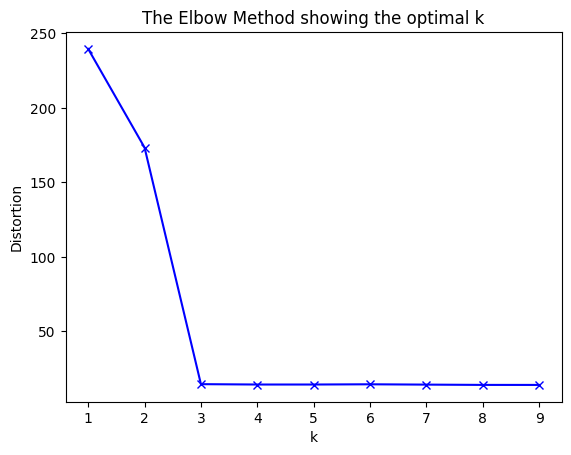

In [58]:
from scipy.spatial.distance import cdist

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=0).fit(toronto_grouped_clustering)
    #kmeanModel.fit(toronto_grouped_clustering)
    distortions.append(sum(np.min(cdist(toronto_grouped_clustering, kmeanModel.cluster_centers_, 'canberra'), axis=1)) / toronto_grouped_clustering.shape[0])

#There are different metric distance function for spatial distance. 
#I choose correlation instaed of euclidean because the canberra function gives me more clear view of elbow break point.

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood

In [59]:
# add clustering labels

neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = df_toronto


In [60]:
neighborhoods_venues_sorted

Cluster Labels                                       Neighborhood  \
0                2                                          Agincourt   
1                0                             Alderwood, Long Branch   
2                2    Bathurst Manor, Wilson Heights, Downsview North   
3                2                                    Bayview Village   
4                2                  Bedford Park, Lawrence Manor East   
5                2                                        Berczy Park   
6                2                        Birch Cliff, Cliffside West   
7                2       Brockton, Parkdale Village, Exhibition Place   
8                2  Business reply mail Processing Centre, South C...   
9                2  CN Tower, King and Spadina, Railway Lands, Har...   
10               1                                Caledonia-Fairbanks   
11               2              Canada Post Gateway Processing Centre   
12               2                                          Cedarbrae   
13               2                                 Central Bay Street   
14               2                                           Christie   
15               2                               Church and Wellesley   
16               2            Clarks Corners, Tam O'Shanter, Sullivan   
17               2    Cliffside, Cliffcrest, Scarborough Village West   
18               2                     Commerce Court, Victoria Hotel   
19               2                                         Davisville   
20               2                                   Davisville North   
21               2   Del Ray, Mount Dennis, Keelsdale and Silverthorn   
22               2                                          Don Mills   
23               2  Dorset Park, Wexford Heights, Scarborough Town...   
24               2                                          Downsview   
25               2                       Dufferin, Dovercourt Village   
26               1      East Toronto, Broadview North (Old East York)   
27               2  Eringate, Bloordale Gardens, Old Burnhamthorpe...   
28               2                       Fairview, Henry Farm, Oriole   
29               2             First Canadian Place, Underground city   
30               2    Forest Hill North & West, Forest Hill Road Park   
31               2                           Garden District, Ryerson   
32               2                                          Glencairn   
33               2                    Golden Mile, Clairlea, Oakridge   
34               2                  Guildwood, Morningside, West Hill   
35               2  Harbourfront East, Union Station, Toronto Islands   
36               2                      High Park, The Junction South   
37               2                                  Hillcrest Village   
38               0                                      Humber Summit   
39               5                                   Humberlea, Emery   
40               2                                 Humewood-Cedarvale   
41               2                     India Bazaar, The Beaches West   
42               2        Kennedy Park, Ionview, East Birchmount Park   
43               2          Kensington Market, Chinatown, Grange Park   
44               0  Kingsview Village, St. Phillips, Martin Grove ...   
45               2                   Lawrence Manor, Lawrence Heights   
46               2                                            Leaside   
47               2                           Little Portugal, Trinity   
48               3                                     Malvern, Rouge   
49               1  Milliken, Agincourt North, Steeles East, L'Amo...   
50               2  Mimico NW, The Queensway West, South of Bloor,...   
51               2                        Moore Park, Summerhill East   
52               2       New Toronto, Mimico South, Humber Bay Shores   
53               1           North Park, Maple Leaf Park, Upwo

In [61]:
toronto_merged

Postal Code           Borough  \
0           M1B       Scarborough   
1           M1C       Scarborough   
2           M1E       Scarborough   
3           M1G       Scarborough   
4           M1H       Scarborough   
5           M1J       Scarborough   
6           M1K       Scarborough   
7           M1L       Scarborough   
8           M1M       Scarborough   
9           M1N       Scarborough   
10          M1P       Scarborough   
11          M1R       Scarborough   
12          M1S       Scarborough   
13          M1T       Scarborough   
14          M1V       Scarborough   
15          M1W       Scarborough   
16          M1X       Scarborough   
17          M2H        North York   
18          M2J        North York   
19          M2K        North York   
20          M2L        North York   
21          M2M        North York   
22          M2N        North York   
23          M2P        North York   
24          M2R        North York   
25          M3A        North York   
26          M3B        North York   
27          M3C        North York   
28          M3H        North York   
29          M3J        North York   
30          M3K        North York   
31          M3L        North York   
32          M3M        North York   
33          M3N        North York   
34          M4A        North York   
35          M4B         East York   
36          M4C         East York   
37          M4E      East Toronto   
38          M4G         East York   
39          M4H         East York   
40          M4J         East York   
41          M4K      East Toronto   
42          M4L      East Toronto   
43          M4M      East Toronto   
44          M4N   Central Toronto   
45          M4P   Central Toronto   
46          M4R   Central Toronto   
47          M4S   Central Toronto   
48          M4T   Central Toronto   
49          M4V   Central Toronto   
50          M4W  Downtown Toronto   
51          M4X  Downtown Toronto   
52          M4Y  Downtown Toronto   
53          M5A  Downtown Toronto   
54          M5B  Downtown Toronto   
55          M5C  Downtown Toronto   
56          M5E  Downtown Toronto   
57          M5G  Downtown Toronto   
58          M5H  Downtown Toronto   
59          M5J  Downtown Toronto   
60          M5K  Downtown Toronto   
61          M5L  Downtown Toronto   
62          M5M        North York   
63          M5N   Central Toronto   
64          M5P   Central Toronto   
65          M5R   Central Toronto   
66          M5S  Downtown Toronto   
67          M5T  Downtown Toronto   
68          M5V  Downtown Toronto   
69          M5W  Downtown Toronto   
70          M5X  Downtown Toronto   
71          M6A        North York   
72          M6B        North York   
73          M6C              York   
74          M6E              York   
75          M6G  Downtown Toronto   
76          M6H      West Toronto   
77          M6J      West Toronto   
78          M6K      West Toronto   
79          M6L        North York   
80          M6M              York   
81          M6N              York   
82          M6P      West Toronto   
83          M6R      West Toronto   
84          M6S      West Toronto   
85          M7A  Downtown Toronto   
86          M7R       Mississauga   
87          M7Y      East Toronto   
88          M8V         Etobicoke   
89          M8W         Etobicoke   
90          M8X         Etobicoke   
91          M8Y         Etobicoke   
92          M8Z         Etobicoke   
93          M9A         Etobicoke   
94          M9B         Etobicoke   
95          M9C         Etobicoke   
96          M9L        North York   
97          M9M        North York   
98          M9N              York   
99          M9P         Etobicoke   
100         M9R         Etobicoke   
101         M9V         Etobicoke   
102         M9W         Etobicoke   

                                          Neighborhood   Latitude  Longitude  \
0                                       Malvern, Rouge  43.806686 -79.19435

In [62]:
#toronto_merged.head()
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

In [63]:
toronto_merged = toronto_merged.dropna(0)

In [64]:
toronto_merged

Postal Code           Borough  \
0           M1B       Scarborough   
1           M1C       Scarborough   
2           M1E       Scarborough   
3           M1G       Scarborough   
4           M1H       Scarborough   
5           M1J       Scarborough   
6           M1K       Scarborough   
7           M1L       Scarborough   
8           M1M       Scarborough   
9           M1N       Scarborough   
10          M1P       Scarborough   
11          M1R       Scarborough   
12          M1S       Scarborough   
13          M1T       Scarborough   
14          M1V       Scarborough   
15          M1W       Scarborough   
17          M2H        North York   
18          M2J        North York   
19          M2K        North York   
21          M2M        North York   
22          M2N        North York   
23          M2P        North York   
24          M2R        North York   
25          M3A        North York   
26          M3B        North York   
27          M3C        North York   
28          M3H        North York   
29          M3J        North York   
30          M3K        North York   
31          M3L        North York   
32          M3M        North York   
33          M3N        North York   
34          M4A        North York   
35          M4B         East York   
36          M4C         East York   
37          M4E      East Toronto   
38          M4G         East York   
39          M4H         East York   
40          M4J         East York   
41          M4K      East Toronto   
42          M4L      East Toronto   
43          M4M      East Toronto   
45          M4P   Central Toronto   
46          M4R   Central Toronto   
47          M4S   Central Toronto   
48          M4T   Central Toronto   
49          M4V   Central Toronto   
50          M4W  Downtown Toronto   
51          M4X  Downtown Toronto   
52          M4Y  Downtown Toronto   
53          M5A  Downtown Toronto   
54          M5B  Downtown Toronto   
55          M5C  Downtown Toronto   
56          M5E  Downtown Toronto   
57          M5G  Downtown Toronto   
58          M5H  Downtown Toronto   
59          M5J  Downtown Toronto   
60          M5K  Downtown Toronto   
61          M5L  Downtown Toronto   
62          M5M        North York   
63          M5N   Central Toronto   
64          M5P   Central Toronto   
65          M5R   Central Toronto   
66          M5S  Downtown Toronto   
67          M5T  Downtown Toronto   
68          M5V  Downtown Toronto   
69          M5W  Downtown Toronto   
70          M5X  Downtown Toronto   
71          M6A        North York   
72          M6B        North York   
73          M6C              York   
74          M6E              York   
75          M6G  Downtown Toronto   
76          M6H      West Toronto   
77          M6J      West Toronto   
78          M6K      West Toronto   
79          M6L        North York   
80          M6M              York   
81          M6N              York   
82          M6P      West Toronto   
83          M6R      West Toronto   
84          M6S      West Toronto   
85          M7A  Downtown Toronto   
86          M7R       Mississauga   
87          M7Y      East Toronto   
88          M8V         Etobicoke   
89          M8W         Etobicoke   
90          M8X         Etobicoke   
91          M8Y         Etobicoke   
92          M8Z         Etobicoke   
94          M9B         Etobicoke   
95          M9C         Etobicoke   
96          M9L        North York   
97          M9M        North York   
98          M9N              York   
99          M9P         Etobicoke   
100         M9R         Etobicoke   
101         M9V         Etobicoke   
102         M9W         Etobicoke   

                                          Neighborhood   Latitude  Longitude  \
0                                       Malvern, Rouge  43.806686 -79.194353   
1               Rouge Hill, Port Union, Highland Creek  43.784535 -79.160497   
2                    Guildwood, Morningside, West Hill  43.7635

In [65]:
# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged['Cluster Labels'] =toronto_merged['Cluster Labels'].astype(int)
toronto_merged # check the last columns!

Postal Code           Borough  \
0           M1B       Scarborough   
1           M1C       Scarborough   
2           M1E       Scarborough   
3           M1G       Scarborough   
4           M1H       Scarborough   
5           M1J       Scarborough   
6           M1K       Scarborough   
7           M1L       Scarborough   
8           M1M       Scarborough   
9           M1N       Scarborough   
10          M1P       Scarborough   
11          M1R       Scarborough   
12          M1S       Scarborough   
13          M1T       Scarborough   
14          M1V       Scarborough   
15          M1W       Scarborough   
17          M2H        North York   
18          M2J        North York   
19          M2K        North York   
21          M2M        North York   
22          M2N        North York   
23          M2P        North York   
24          M2R        North York   
25          M3A        North York   
26          M3B        North York   
27          M3C        North York   
28          M3H        North York   
29          M3J        North York   
30          M3K        North York   
31          M3L        North York   
32          M3M        North York   
33          M3N        North York   
34          M4A        North York   
35          M4B         East York   
36          M4C         East York   
37          M4E      East Toronto   
38          M4G         East York   
39          M4H         East York   
40          M4J         East York   
41          M4K      East Toronto   
42          M4L      East Toronto   
43          M4M      East Toronto   
45          M4P   Central Toronto   
46          M4R   Central Toronto   
47          M4S   Central Toronto   
48          M4T   Central Toronto   
49          M4V   Central Toronto   
50          M4W  Downtown Toronto   
51          M4X  Downtown Toronto   
52          M4Y  Downtown Toronto   
53          M5A  Downtown Toronto   
54          M5B  Downtown Toronto   
55          M5C  Downtown Toronto   
56          M5E  Downtown Toronto   
57          M5G  Downtown Toronto   
58          M5H  Downtown Toronto   
59          M5J  Downtown Toronto   
60          M5K  Downtown Toronto   
61          M5L  Downtown Toronto   
62          M5M        North York   
63          M5N   Central Toronto   
64          M5P   Central Toronto   
65          M5R   Central Toronto   
66          M5S  Downtown Toronto   
67          M5T  Downtown Toronto   
68          M5V  Downtown Toronto   
69          M5W  Downtown Toronto   
70          M5X  Downtown Toronto   
71          M6A        North York   
72          M6B        North York   
73          M6C              York   
74          M6E              York   
75          M6G  Downtown Toronto   
76          M6H      West Toronto   
77          M6J      West Toronto   
78          M6K      West Toronto   
79          M6L        North York   
80          M6M              York   
81          M6N              York   
82          M6P      West Toronto   
83          M6R      West Toronto   
84          M6S      West Toronto   
85          M7A  Downtown Toronto   
86          M7R       Mississauga   
87          M7Y      East Toronto   
88          M8V         Etobicoke   
89          M8W         Etobicoke   
90          M8X         Etobicoke   
91          M8Y         Etobicoke   
92          M8Z         Etobicoke   
94          M9B         Etobicoke   
95          M9C         Etobicoke   
96          M9L        North York   
97          M9M        North York   
98          M9N              York   
99          M9P         Etobicoke   
100         M9R         Etobicoke   
101         M9V         Etobicoke   
102         M9W         Etobicoke   

                                          Neighborhood   Latitude  Longitude  \
0                                       Malvern, Rouge  43.806686 -79.194353   
1               Rouge Hill, Port Union, Highland Creek  43.784535 -79.160497   
2                    Guildwood, Morningside, West Hill  43.7635

In [66]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster-1)],
        fill=True,
        fill_color=rainbow[int(cluster-1)],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [67]:
count_venue = toronto_merged
count_venue = count_venue.drop(['Postal Code','Borough','Neighborhood', 'Latitude', 'Longitude', 'Cases'], axis=1)
count_venue = count_venue.groupby(['Cluster Labels','1st Most Common Venue']).size().reset_index(name='Counts')




In [68]:
count_venue

Cluster Labels      1st Most Common Venue  Counts
0                0          Convenience Store       1
1                0                        Gym       1
2                0                       Park       1
3                0                Pizza Place       3
4                1                       Park       9
5                1              Women's Store       1
6                2            Airport Service       1
7                2        American Restaurant       1
8                2         Athletics & Sports       1
9                2                     Bakery       2
10               2                        Bar       1
11               2                   Bus Line       1
12               2                       Café       7
13               2             Clothing Store       2
14               2                Coffee Shop      22
15               2             Discount Store       1
16               2                  Drugstore       1
17               2       Fast Food Restaurant       1
18               2     Furniture / Home Store       1
19               2                     Garden       1
20               2                Gas Station       1
21               2                Golf Course       1
22               2           Greek Restaurant       1
23               2              Grocery Store       9
24               2               Hockey Arena       1
25               2                      Hotel       1
26               2          Indian Restaurant       1
27               2        Japanese Restaurant       1
28               2              Jewelry Store       1
29               2                     Lounge       1
30               2              Metro Station       1
31               2         Mexican Restaurant       1
32               2                       Park       1
33               2                  Pet Store       2
34               2                   Pharmacy       1
35               2                Pizza Place       3
36               2      Portuguese Restaurant       1
37               2                 Restaurant       1
38               2             Sandwich Place       2
39               2               Skating Rink       1
40               2                      Trail       1
41               2                Yoga Studio       1
42               3       Fast Food Restaurant       1
43               4                    Dog Run       1
44               5             Baseball Field       2
45               6                        Bar       1
46               7  Middle Eastern Restaurant       1

In [69]:
#we can transpose it to plot bar chart
cv_cluster = count_venue.pivot(index='Cluster Labels', columns='1st Most Common Venue', values='Counts')
cv_cluster = cv_cluster.fillna(0).astype(int).reset_index(drop=True)
cv_cluster

1st Most Common Venue  Airport Service  American Restaurant  \
0                                    0                    0   
1                                    0                    0   
2                                    1                    1   
3                                    0                    0   
4                                    0                    0   
5                                    0                    0   
6                                    0                    0   
7                                    0                    0   

1st Most Common Venue  Athletics & Sports  Bakery  Bar  Baseball Field  \
0                                       0       0    0               0   
1                                       0       0    0               0   
2                                       1       2    1               0   
3                                       0       0    0               0   
4                                       0       0    0               0   
5                                       0       0    0               2   
6                                       0       0    1               0   
7                                       0       0    0               0   

1st Most Common Venue  Bus Line  Café  Clothing Store  Coffee Shop  \
0                             0     0               0            0   
1                             0     0               0            0   
2                             1     7               2           22   
3                             0     0               0            0   
4                             0     0               0            0   
5                             0     0               0            0   
6                             0     0               0            0   
7                             0     0               0            0   

1st Most Common Venue  Convenience Store  Discount Store  Dog Run  Drugstore  \
0                                      1               0        0          0   
1                                      0               0        0          0   
2                                      0               1        0          1   
3                                      0               0        0          0   
4                                      0               0        1          0   
5                                      0               0        0          0   
6                                      0               0        0          0   
7                                      0               0        0          0   

1st Most Common Venue  Fast Food Restaurant  Furniture / Home Store  Garden  \
0                                         0                       0       0   
1                                         0                       0       0   
2                                         1                       1       1   
3                                         1                       0       0   
4                                         0                       0       0   
5                                         0                       0       0   
6                                         0                       0       0   
7                                         0                       0       0   

1st Most Common Venue  Gas Station  Golf Course  Greek Restaurant  \
0                                0            0                 0   
1                                0            0                 0   
2                                1            1                 1   
3                                0            0                 0   
4                                0            0                 0   
5                                0            0                 0   
6                                0            0                 0   
7                                0            0                 0   

1st Most Common Venue  Grocery Store  Gym  Hockey Arena  Hotel  \
0            

Text(0, 0.5, 'Clusters')

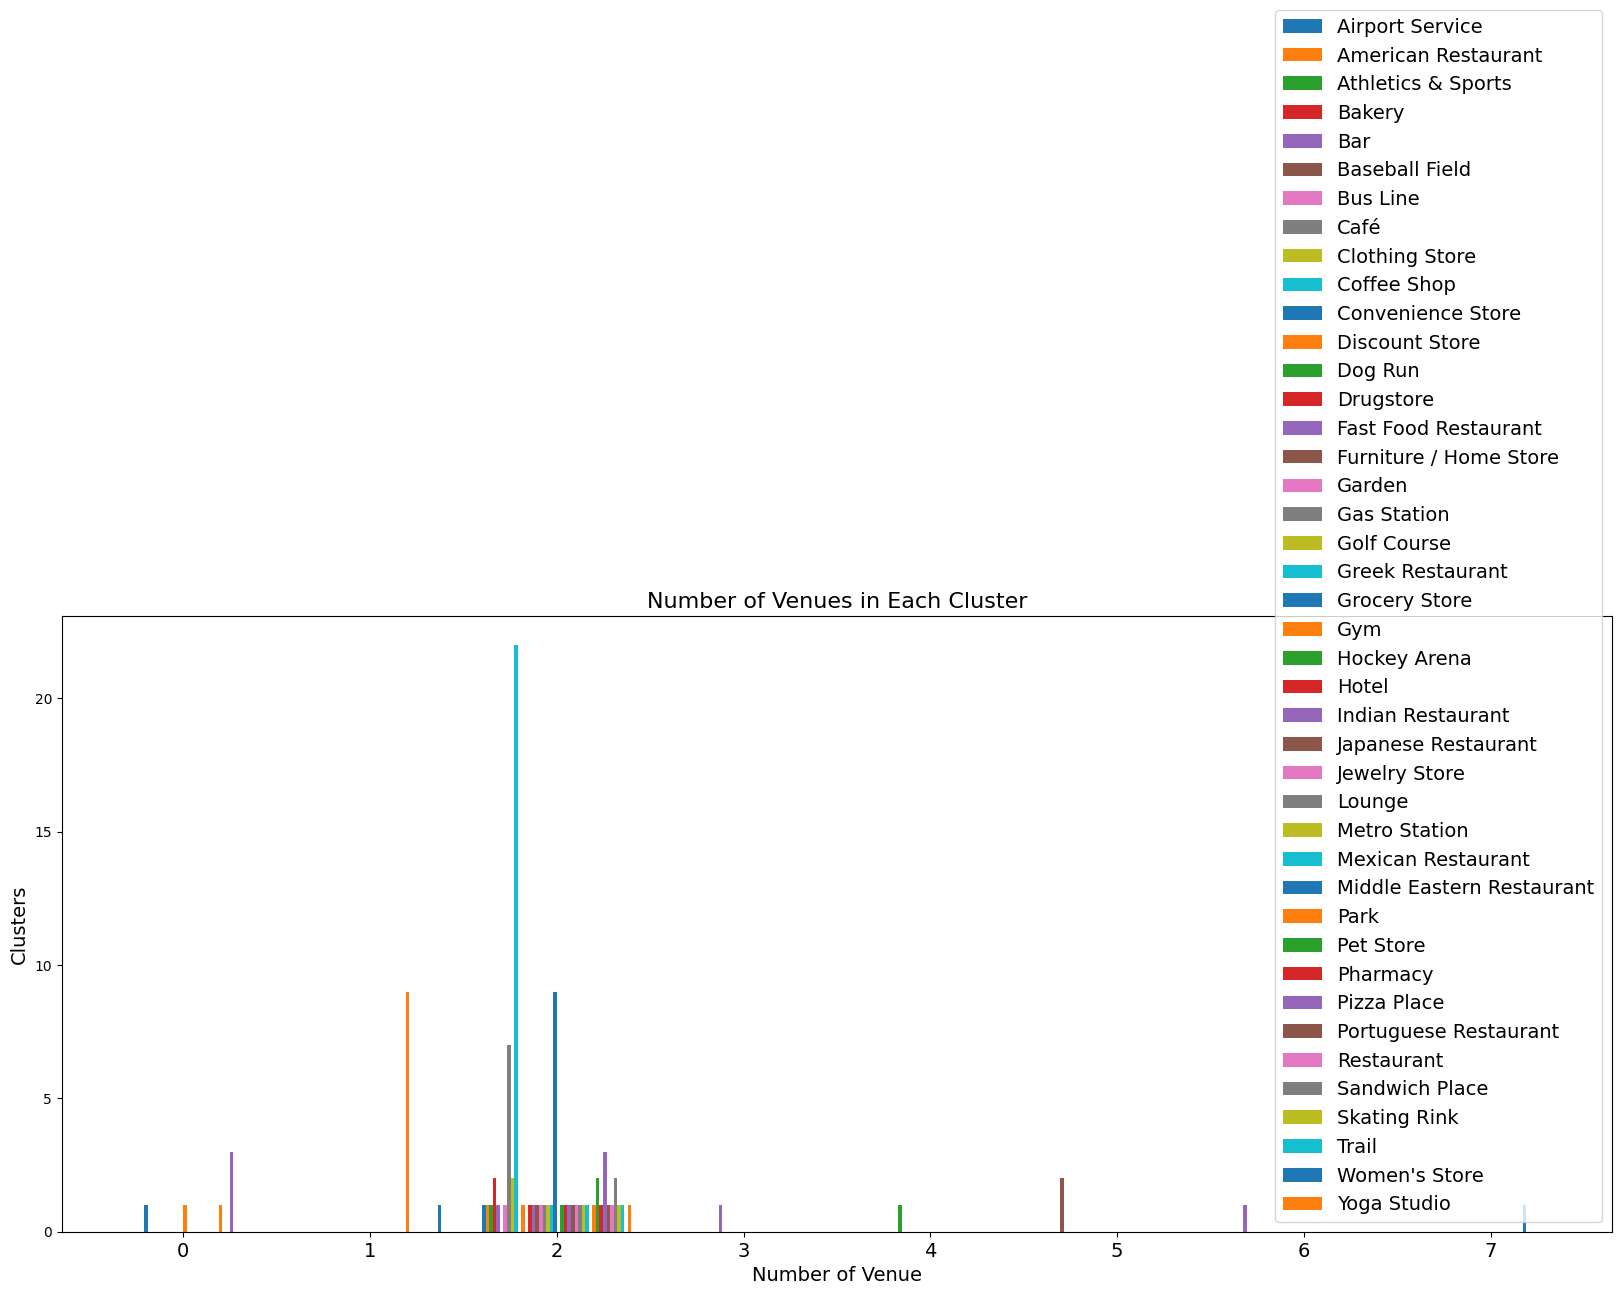

In [70]:
frame=cv_cluster.plot(kind='bar',figsize=(20,8),width = 0.8)

plt.legend(labels=cv_cluster.columns,fontsize= 14)
plt.title("Number of Venues in Each Cluster",fontsize= 16)
plt.xticks(fontsize=14)
plt.xticks(rotation=0)
plt.xlabel('Number of Venue', fontsize=14)
plt.ylabel('Clusters', fontsize=14)

產生分級圖和cluster圖

In [72]:
toronto_merged

Postal Code           Borough  \
0           M1B       Scarborough   
1           M1C       Scarborough   
2           M1E       Scarborough   
3           M1G       Scarborough   
4           M1H       Scarborough   
5           M1J       Scarborough   
6           M1K       Scarborough   
7           M1L       Scarborough   
8           M1M       Scarborough   
9           M1N       Scarborough   
10          M1P       Scarborough   
11          M1R       Scarborough   
12          M1S       Scarborough   
13          M1T       Scarborough   
14          M1V       Scarborough   
15          M1W       Scarborough   
17          M2H        North York   
18          M2J        North York   
19          M2K        North York   
21          M2M        North York   
22          M2N        North York   
23          M2P        North York   
24          M2R        North York   
25          M3A        North York   
26          M3B        North York   
27          M3C        North York   
28          M3H        North York   
29          M3J        North York   
30          M3K        North York   
31          M3L        North York   
32          M3M        North York   
33          M3N        North York   
34          M4A        North York   
35          M4B         East York   
36          M4C         East York   
37          M4E      East Toronto   
38          M4G         East York   
39          M4H         East York   
40          M4J         East York   
41          M4K      East Toronto   
42          M4L      East Toronto   
43          M4M      East Toronto   
45          M4P   Central Toronto   
46          M4R   Central Toronto   
47          M4S   Central Toronto   
48          M4T   Central Toronto   
49          M4V   Central Toronto   
50          M4W  Downtown Toronto   
51          M4X  Downtown Toronto   
52          M4Y  Downtown Toronto   
53          M5A  Downtown Toronto   
54          M5B  Downtown Toronto   
55          M5C  Downtown Toronto   
56          M5E  Downtown Toronto   
57          M5G  Downtown Toronto   
58          M5H  Downtown Toronto   
59          M5J  Downtown Toronto   
60          M5K  Downtown Toronto   
61          M5L  Downtown Toronto   
62          M5M        North York   
63          M5N   Central Toronto   
64          M5P   Central Toronto   
65          M5R   Central Toronto   
66          M5S  Downtown Toronto   
67          M5T  Downtown Toronto   
68          M5V  Downtown Toronto   
69          M5W  Downtown Toronto   
70          M5X  Downtown Toronto   
71          M6A        North York   
72          M6B        North York   
73          M6C              York   
74          M6E              York   
75          M6G  Downtown Toronto   
76          M6H      West Toronto   
77          M6J      West Toronto   
78          M6K      West Toronto   
79          M6L        North York   
80          M6M              York   
81          M6N              York   
82          M6P      West Toronto   
83          M6R      West Toronto   
84          M6S      West Toronto   
85          M7A  Downtown Toronto   
86          M7R       Mississauga   
87          M7Y      East Toronto   
88          M8V         Etobicoke   
89          M8W         Etobicoke   
90          M8X         Etobicoke   
91          M8Y         Etobicoke   
92          M8Z         Etobicoke   
94          M9B         Etobicoke   
95          M9C         Etobicoke   
96          M9L        North York   
97          M9M        North York   
98          M9N              York   
99          M9P         Etobicoke   
100         M9R         Etobicoke   
101         M9V         Etobicoke   
102         M9W         Etobicoke   

                                          Neighborhood   Latitude  Longitude  \
0                                       Malvern, Rouge  43.806686 -79.194353   
1               Rouge Hill, Port Union, Highland Creek  43.784535 -79.160497   
2                    Guildwood, Morningside, West Hill  43.7635

In [98]:

#toronto_geo = pd.read_csv('https://raw.githubusercontent.com/ag2816/Visualizations/master/data/T1201EN.CSV')

#Toronto
'''latitude = 43.724846
longitude =  -79.372596'''

# display Toronto
map_toronto = folium.Map(location=[43.653963, -79.387207], zoom_start=10)
toronto_geo = "https://raw.githubusercontent.com/ag2816/Visualizations/master/data/Toronto2.geojson"
map_toronto.choropleth(geo_data=toronto_geo,
    data = toronto_merged,
    columns=['Postal Code','Cases'],
    key_on='feature.properties.CFSAUID',
    fill_color='YlOrRd',
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Covid19 cases comfiemed')  

markers_colors = []
markers_colors = []
for lat, lon, poi, cluster, Covid19cases in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels'], toronto_merged['Cases']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster)+ ' Covid19-cases:'+str(Covid19cases), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster-1)],
        fill=True,
        fill_color=rainbow[int(cluster-1)],
        fill_opacity=0.7).add_to(map_toronto) 
    
map_toronto

/usr/local/lib/python3.6/dist-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [ ]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

Borough  Cluster Labels 1st Most Common Venue  \
0        Scarborough               0  Fast Food Restaurant   
5        Scarborough               0           Pizza Place   
8        Scarborough               0                 Motel   
10       Scarborough               0     Indian Restaurant   
13       Scarborough               0              Pharmacy   
15       Scarborough               0  Fast Food Restaurant   
16       Scarborough               0                     0   
20        North York               0                     0   
22        North York               0      Ramen Restaurant   
24        North York               0           Pizza Place   
35         East York               0           Pizza Place   
39         East York               0     Indian Restaurant   
42      East Toronto               0        Sandwich Place   
45   Central Toronto               0  Gym / Fitness Center   
47   Central Toronto               0          Dessert Shop   
48   Central Toronto               0                   Gym   
62        North York               0        Sandwich Place   
65   Central Toronto               0                  Café   
80              York               0    Turkish Restaurant   
88         Etobicoke               0              Pharmacy   
89         Etobicoke               0           Pizza Place   
92         Etobicoke               0                   Gym   
93         Etobicoke               0                     0   
95         Etobicoke               0              Pharmacy   
96        North York               0                     0   
99         Etobicoke               0           Pizza Place   
100        Etobicoke               0           Pizza Place   
101        Etobicoke               0         Grocery Store   

         2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
0                 Dessert Shop    Falafel Restaurant           Event Space   
5                   Playground      Doner Restaurant          Dessert Shop   
8          American Restaurant            Donut Shop                 Diner   
10       Vietnamese Restaurant    Chinese Restaurant             Pet Store   
13                 Pizza Place           Gas Station  Fast Food Restaurant   
15          Chinese Restaurant           Pizza Place                  Bank   
16                           0                     0                     0   
20                           0                     0                     0   
22                        Café        Sandwich Place           Coffee Shop   
24                        Bank           Coffee Shop               Butcher   
35                   Gastropub                  Café    Athletics & Sports   
39              Sandwich Place           Yoga Studio           Pizza Place   
42              Ice Cream Shop                   Pub          Liquor Store   
45                       Hotel           Pizza Place      Department Store   
47              Sandwich Place           Pizza Place      Sushi Restaurant   
48                  Restaurant         Women's Store      Doner Restaurant   
62          Italian Restaurant            Restaurant           Coffee Shop   
65              Sandwich Place           Coffee Shop          Liquor Store   
80              Sandwich Place        Discount Store     Convenience Store   
88                      Bakery   Fried Chicken Joint  Fast Food Restaurant   
89              Sandwich Place           Coffee Shop                   Pub   
92      Thrift / Vintage Store  Fast Food Restaurant        Sandwich Place   
93                           0                     0                     0   
95                  Beer Store             Pet Store           Pizza Place   
96                           0                     0                     0   
99   Middle Eastern Restaurant          Intersection        Sandwich Place   
100             Sandwich Place              Bus Line     Mobile Phone Shop   
101                 Beer Store

In [ ]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

In [ ]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

In [ ]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

In [ ]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 4, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]